<h3>Elementary School Analysis - Charlotte, NC</h3>

<h6>Utilized "NC School Report Cards" as a Data Source (ncpublicschools.org)</h6></n>
<h6>Demographics pulled from schooldigger.com</h6></n>
<h6>Schools analyzed are within my geographical area of Charlotte</h6>
<h6>Updated 8-04-2019</h6>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

<h2>Data Preparation Section</h2>

In [49]:
#Find and load data 
datDir = (r'C:\Users\Reaper124\Documents\School_Data\ElemSchoolData.csv')
datdf = pd.read_csv(datDir)
datdf.head(5)

,School Name,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize,TeachRatio,White,Black,Hispanic,Asian,Mixed/other
0,chantilly montesorri,85.04,85.2,84.4,87.2,81.2,92.3,292.0,17.0,72.2,15.9,8.7,1.5,1.5
1,charlotte lab,66.02,67.2,61.3,73.4,64.1,52.9,404.0,15.0,66.8,13.4,7.2,1.7,10.6
2,brookstone schools,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,metro school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,first ward creative arts academy,58.10,58.8,55.3,52.4,61.5,69.8,572.0,14.3,5.2,67.7,22.2,0.3,4.5


In [50]:
#remove missing values
datdf = datdf.dropna(axis=0)
#datdf['School Name'] = datdf['School Name'].str.upper()
datdf

,School Name,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize,TeachRatio,White,Black,Hispanic,Asian,Mixed/other
0,chantilly montesorri,85.04,85.2,84.4,87.2,81.2,92.3,292.0,17.0,72.2,15.9,8.7,1.5,1.5
1,charlotte lab,66.02,67.2,61.3,73.4,64.1,52.9,404.0,15.0,66.8,13.4,7.2,1.7,10.6
4,first ward creative arts academy,58.10,58.8,55.3,52.4,61.5,69.8,572.0,14.3,5.2,67.7,22.2,0.3,4.5
5,billingsville elementary,48.92,40.5,82.6,32.2,44.3,55.8,329.0,13.8,1.2,83.0,11.2,2.4,2.1
6,cotswold elementary,71.02,69.7,76.3,67.1,70.7,75.4,814.0,15.8,55.9,28.5,11.3,3.1,1.2
7,rama road elementary,58.86,50.9,90.7,40.9,54.0,65.7,603.0,15.2,19.7,45.4,28.0,4.5,2.3
8,Selewyn Elementary,86.34,87.4,82.1,85.2,89.3,88.9,860.0,18.2,79.3,9.2,7.0,2.0,2.6
9,Sharon Elementary,78.68,80.3,72.2,79.3,79.8,84.4,830.0,17.9,69.6,13.1,5.1,9.2,2.9
10,Park Road Montesorri,86.12,86.8,83.4,83.6,89.5,88.5,513.0,18.2,68.0,12.5,6.6,9.2,3.7
11,Oakhurst STEAM Academy,57.12,55.2,64.8,44.6,57.6,70.3,631.0,15.5,15.5,44.2,31.2,6.5,2.6


<h4>All Schools Data</h4>

In [51]:
#Basic descriptive statistics for the dataframe
datdf.describe()

,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize,TeachRatio,White,Black,Hispanic,Asian,Mixed/other
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,73.582353,72.670588,77.229412,68.988235,73.988235,78.923529,630.882353,16.641176,49.023529,29.964706,10.752941,6.982353,3.235294
std,13.007305,15.314281,9.733047,17.836651,15.156512,13.122430,212.068351,1.566069,26.819968,24.269321,8.411385,7.938217,2.103254
min,48.920000,40.500000,55.300000,32.200000,44.300000,52.900000,292.000000,13.800000,1.200000,4.200000,3.000000,0.300000,1.200000
25%,66.020000,65.200000,72.100000,61.900000,61.500000,69.800000,513.000000,15.500000,19.700000,12.500000,5.300000,2.000000,2.300000
50%,71.020000,69.700000,81.200000,73.400000,72.500000,83.900000,603.000000,17.000000,66.300000,21.900000,7.200000,3.100000,2.600000
75%,86.120000,86.400000,83.400000,83.600000,89.300000,88.900000,814.000000,17.900000,69.600000,45.400000,11.300000,9.200000,3.700000
max,90.160000,92.700000,90.700000,91.200000,93.100000,95.000000,1021.000000,18.900000,79.300000,83.000000,31.200000,31.100000,10.600000


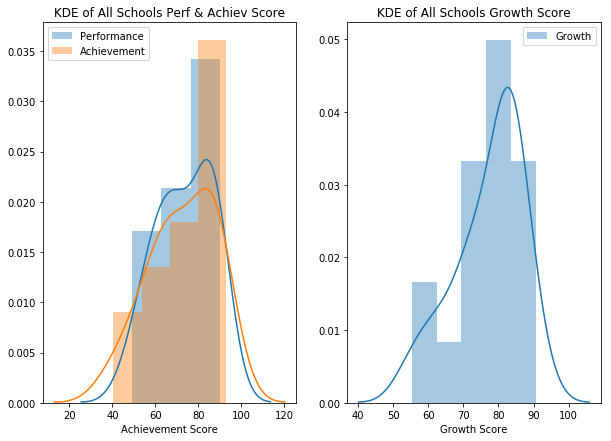

In [52]:
"""
Kernal Density Estimation of all data. Shows mostly normal distribution.
Mean Performance = 73.58
Mean Achievement = 72.67
Mean Growth = 77.23 i.e. growth seems to be increasing overall scores
"""
f, axs = plt.subplots(2,2,figsize=(10,7))

plt.subplot(1, 2, 1)
sns.distplot(datdf['Performance Score'], label = 'Performance')
sns.distplot(datdf['Achievement Score'], label = 'Achievement').set_title('KDE of All Schools Perf & Achiev Score')
plt.legend();

plt.subplot(1, 2, 2)
sns.distplot(datdf['Growth Score'], label = 'Growth').set_title('KDE of All Schools Growth Score')
plt.legend();

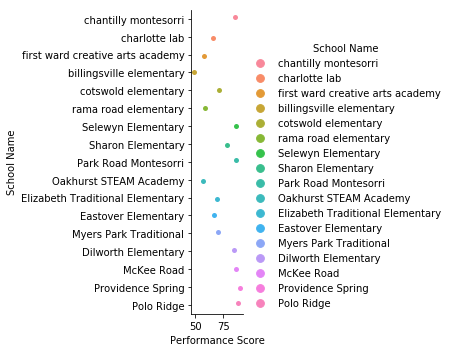

In [53]:
splot = sns.catplot(x="Performance Score", y="School Name", hue='School Name', data=datdf)

Text(0.5, 1.0, 'Scatterplot - Correlation between Achievement and Growth')

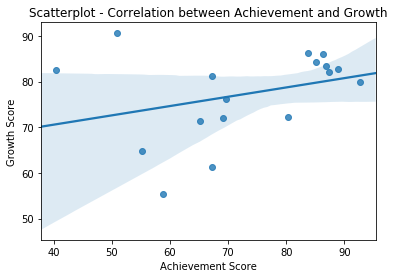

In [54]:
"""
Minor positive linear Correlation between Achievement and Growth Scores for all schools analyzed. 
"""
ax = sns.regplot(x="Achievement Score", y="Growth Score", data=datdf)
ax = plt.gca()
ax.set_title("Scatterplot - Correlation between Achievement and Growth")

Text(0.5, 1.0, 'Scatterplot - Correlation between Performance and Achievement')

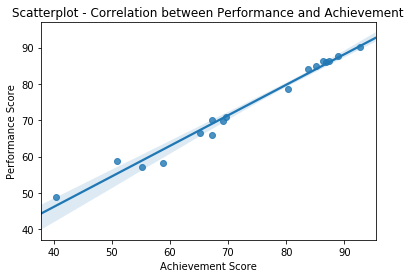

In [55]:
"""
Highly positive correlation between Achievement score and Performance Score.
"""

ax = sns.regplot(x="Achievement Score", y="Performance Score", data=datdf)
ax = plt.gca()
ax.set_title("Scatterplot - Correlation between Performance and Achievement")

Text(0.5, 1.0, 'School Achievement Score Scatter Plot')

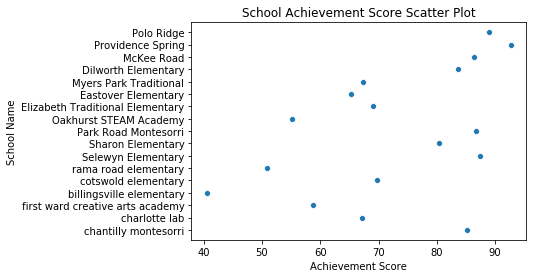

In [9]:
#Scatter plot of Achievement by School
scatterplot = sns.scatterplot(x="Achievement Score", y="School Name", data=datdf)
ax = plt.gca()
ax.set_title("School Achievement Score Scatter Plot")

Text(0.5, 1.0, 'School Performance Score Scatter Plot')

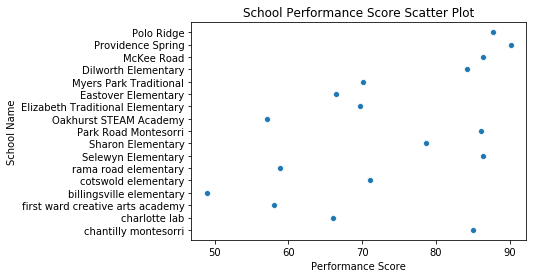

In [10]:
#Scatter plot of Achievement by School
scatterplot = sns.scatterplot(x="Performance Score", y="School Name", data=datdf)
ax = plt.gca()
ax.set_title("School Performance Score Scatter Plot")

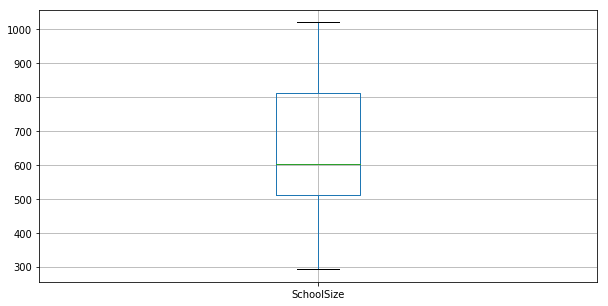

In [11]:
"""
Very large range in school size for all schools.

"""
#School Size Boxplot
#pd.options.display.mpl_style = 'default'
fig, ax = plt.subplots(figsize=(10,5))
datdf[['SchoolSize']].boxplot()

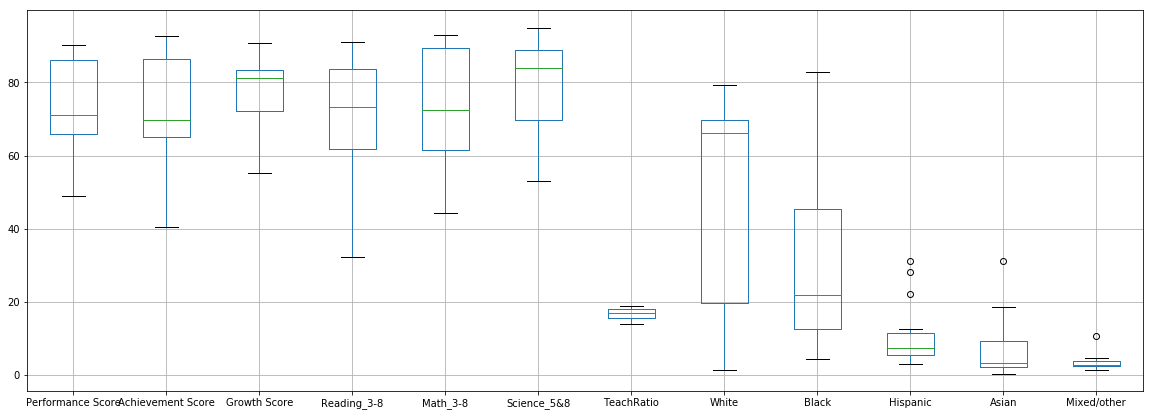

In [12]:
"""
Multi boxplot to analyze certain score and race data

"""
#pd.options.display.mpl_style = 'default'
fig, ax = plt.subplots(figsize=(20,7))
datdf[['Performance Score','Achievement Score','Growth Score','Reading_3-8','Math_3-8','Science_5&8','TeachRatio','White','Black','Hispanic','Asian','Mixed/other']].boxplot()

<h2>Exploratory Analysis for Top 5 Performing Schools</h2>

<h4>Top 5 Performing Schools</h4>

In [13]:
#Sort schools based on Performance score
datdf.sort_values('Performance Score', ascending = False, inplace= True)
datdf.head(5)

,School Name,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize,TeachRatio,White,Black,Hispanic,Asian,Mixed/other
17,Providence Spring,90.16,92.7,80.0,91.2,93.1,95.0,932.0,18.9,70.0,4.2,5.0,18.6,2.3
18,Polo Ridge,87.76,89.0,82.8,86.5,90.0,93.2,1021.0,17.8,53.5,7.1,5.3,31.1,3.1
8,Selewyn Elementary,86.34,87.4,82.1,85.2,89.3,88.9,860.0,18.2,79.3,9.2,7.0,2.0,2.6
16,McKee Road,86.34,86.4,86.1,80.4,91.8,88.4,514.0,15.8,66.3,7.8,8.6,13.4,3.9
10,Park Road Montesorri,86.12,86.8,83.4,83.6,89.5,88.5,513.0,18.2,68.0,12.5,6.6,9.2,3.7


In [14]:
top_df = datdf.iloc[0:5, 0:8]
top_df.describe()

,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0000
mean,87.344000,88.460000,82.880000,85.380000,90.740000,90.800000,768.0000
std,1.704195,2.568657,2.210656,3.972657,1.647119,3.084639,239.2227
min,86.120000,86.400000,80.000000,80.400000,89.300000,88.400000,513.0000
25%,86.340000,86.800000,82.100000,83.600000,89.500000,88.500000,514.0000
50%,86.340000,87.400000,82.800000,85.200000,90.000000,88.900000,860.0000
75%,87.760000,89.000000,83.400000,86.500000,91.800000,93.200000,932.0000
max,90.160000,92.700000,86.100000,91.200000,93.100000,95.000000,1021.0000


In [15]:
top_df

,School Name,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize
17,Providence Spring,90.16,92.7,80.0,91.2,93.1,95.0,932.0
18,Polo Ridge,87.76,89.0,82.8,86.5,90.0,93.2,1021.0
8,Selewyn Elementary,86.34,87.4,82.1,85.2,89.3,88.9,860.0
16,McKee Road,86.34,86.4,86.1,80.4,91.8,88.4,514.0
10,Park Road Montesorri,86.12,86.8,83.4,83.6,89.5,88.5,513.0


Text(0.5, 1.0, 'School Performance Score Scatter Plot')

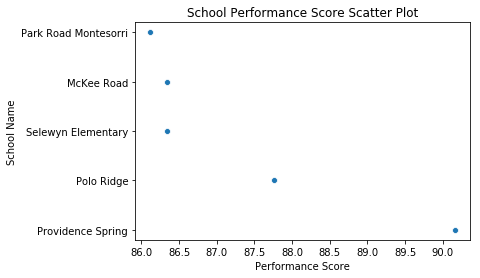

In [16]:
#Scatter plot of Achievement by School
scatterplot = sns.scatterplot(x="Performance Score", y="School Name", data=top_df)
ax = plt.gca()
ax.set_title("School Performance Score Scatter Plot")

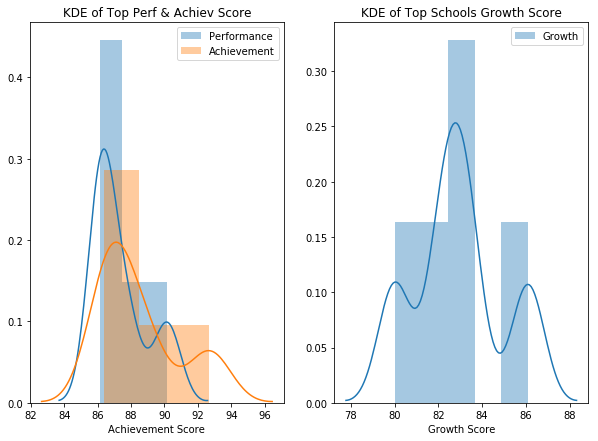

In [17]:
"""
Top performing schools show a bimodal distribution for performance and growth.
Mean of Performance, Achievement and Growth are all >80.0

"""

f, axs = plt.subplots(2,2,figsize=(10,7))

plt.subplot(1, 2, 1)
sns.distplot(top_df['Performance Score'], label = 'Performance')
sns.distplot(top_df['Achievement Score'], label = 'Achievement').set_title('KDE of Top Perf & Achiev Score')
plt.legend();

plt.subplot(1, 2, 2)
sns.distplot(top_df['Growth Score'], label = 'Growth').set_title('KDE of Top Schools Growth Score')
plt.legend();

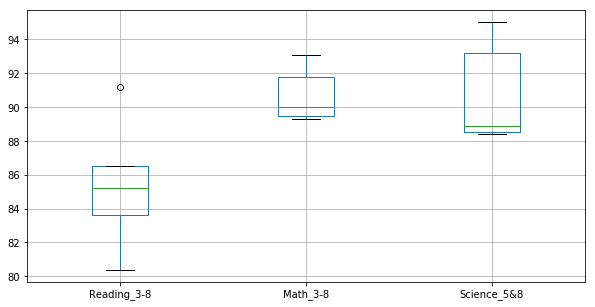

In [18]:
#Boxplot of Reading, Math, and Science Scores
fig, ax = plt.subplots(figsize=(10,5))
top_df[['Reading_3-8','Math_3-8','Science_5&8']].boxplot()

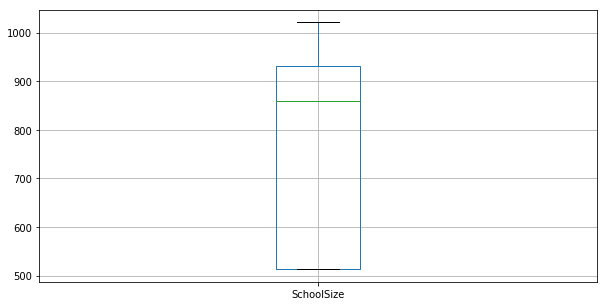

In [19]:
"""
Very large range in school size for top schools similar to all schools analyzed.

"""
#School Size Boxplot
#pd.options.display.mpl_style = 'default'
fig, ax = plt.subplots(figsize=(10,5))
top_df[['SchoolSize']].boxplot()

<h3>Various Other Analysis between All Schools</h3>

In [20]:
#Sort top schools based on Achievement score
datdf.sort_values('Achievement Score', ascending = False, inplace= True)
datdf.head(7)

,School Name,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize,TeachRatio,White,Black,Hispanic,Asian,Mixed/other
17,Providence Spring,90.16,92.7,80.0,91.2,93.1,95.0,932.0,18.9,70.0,4.2,5.0,18.6,2.3
18,Polo Ridge,87.76,89.0,82.8,86.5,90.0,93.2,1021.0,17.8,53.5,7.1,5.3,31.1,3.1
8,Selewyn Elementary,86.34,87.4,82.1,85.2,89.3,88.9,860.0,18.2,79.3,9.2,7.0,2.0,2.6
10,Park Road Montesorri,86.12,86.8,83.4,83.6,89.5,88.5,513.0,18.2,68.0,12.5,6.6,9.2,3.7
16,McKee Road,86.34,86.4,86.1,80.4,91.8,88.4,514.0,15.8,66.3,7.8,8.6,13.4,3.9
0,chantilly montesorri,85.04,85.2,84.4,87.2,81.2,92.3,292.0,17.0,72.2,15.9,8.7,1.5,1.5
15,Dilworth Elementary,84.22,83.7,86.3,79.2,86.6,89.2,732.0,17.9,70.2,21.9,3.1,2.3,2.5


In [21]:
#Sort schools based on Growth score
datdf.sort_values('Growth Score', ascending = False, inplace= True)
datdf.head(7)

,School Name,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize,TeachRatio,White,Black,Hispanic,Asian,Mixed/other
7,rama road elementary,58.86,50.9,90.7,40.9,54.0,65.7,603.0,15.2,19.7,45.4,28.0,4.5,2.3
15,Dilworth Elementary,84.22,83.7,86.3,79.2,86.6,89.2,732.0,17.9,70.2,21.9,3.1,2.3,2.5
16,McKee Road,86.34,86.4,86.1,80.4,91.8,88.4,514.0,15.8,66.3,7.8,8.6,13.4,3.9
0,chantilly montesorri,85.04,85.2,84.4,87.2,81.2,92.3,292.0,17.0,72.2,15.9,8.7,1.5,1.5
10,Park Road Montesorri,86.12,86.8,83.4,83.6,89.5,88.5,513.0,18.2,68.0,12.5,6.6,9.2,3.7
18,Polo Ridge,87.76,89.0,82.8,86.5,90.0,93.2,1021.0,17.8,53.5,7.1,5.3,31.1,3.1
5,billingsville elementary,48.92,40.5,82.6,32.2,44.3,55.8,329.0,13.8,1.2,83.0,11.2,2.4,2.1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C53A84E978>,
      dtype=object)

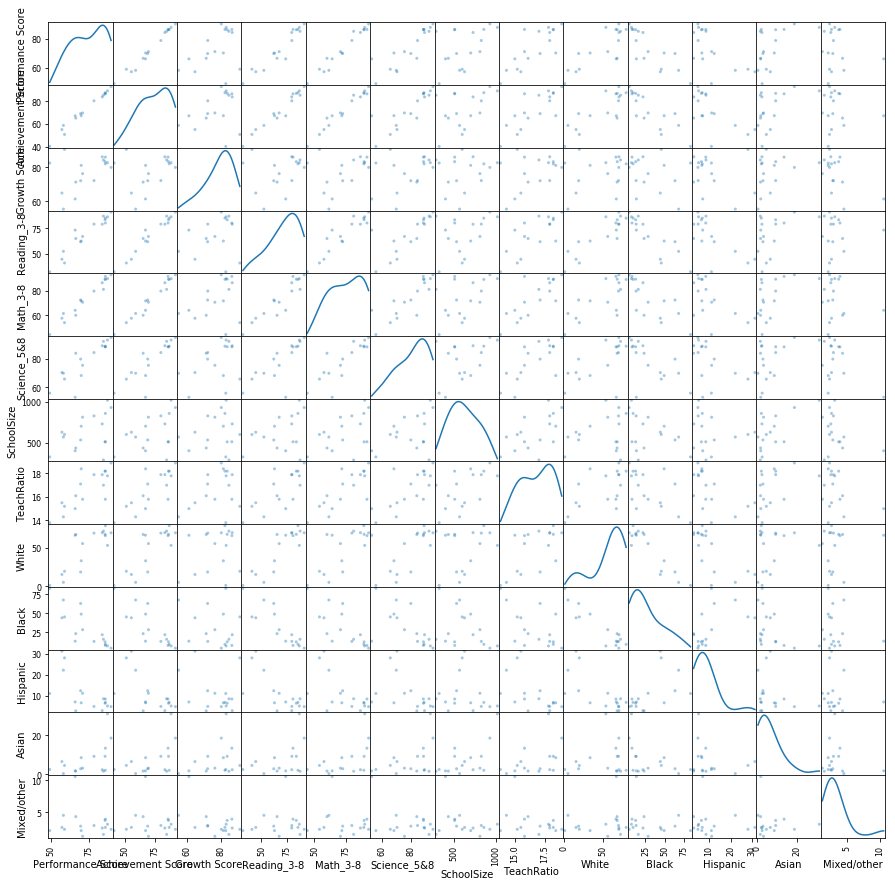

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(datdf, alpha=0.4, figsize=(15, 15), diagonal='kde')

In [23]:
#Sort schools based on Math_3-8 score
datdf.sort_values('Math_3-8', ascending = False, inplace= True)
datdf

,School Name,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize,TeachRatio,White,Black,Hispanic,Asian,Mixed/other
17,Providence Spring,90.16,92.7,80.0,91.2,93.1,95.0,932.0,18.9,70.0,4.2,5.0,18.6,2.3
16,McKee Road,86.34,86.4,86.1,80.4,91.8,88.4,514.0,15.8,66.3,7.8,8.6,13.4,3.9
18,Polo Ridge,87.76,89.0,82.8,86.5,90.0,93.2,1021.0,17.8,53.5,7.1,5.3,31.1,3.1
10,Park Road Montesorri,86.12,86.8,83.4,83.6,89.5,88.5,513.0,18.2,68.0,12.5,6.6,9.2,3.7
8,Selewyn Elementary,86.34,87.4,82.1,85.2,89.3,88.9,860.0,18.2,79.3,9.2,7.0,2.0,2.6
15,Dilworth Elementary,84.22,83.7,86.3,79.2,86.6,89.2,732.0,17.9,70.2,21.9,3.1,2.3,2.5
0,chantilly montesorri,85.04,85.2,84.4,87.2,81.2,92.3,292.0,17.0,72.2,15.9,8.7,1.5,1.5
9,Sharon Elementary,78.68,80.3,72.2,79.3,79.8,84.4,830.0,17.9,69.6,13.1,5.1,9.2,2.9
12,Elizabeth Traditional Elementary,69.70,69.1,72.1,61.9,72.5,79.8,536.0,17.1,18.8,63.1,12.5,2.8,2.8
14,Myers Park Traditional,70.08,67.3,81.2,62.6,71.8,68.2,704.0,18.4,33.4,49.1,6.8,8.5,2.1


Text(0.5, 1.0, 'School Math Scatter Plot')

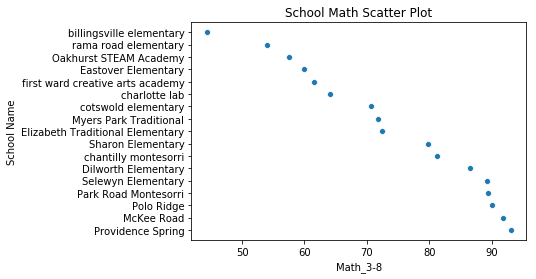

In [24]:
#Scatter plot of Math Score by School
scatterplot = sns.scatterplot(x="Math_3-8", y="School Name", data=datdf)
ax = plt.gca()
ax.set_title("School Math Scatter Plot")

In [25]:
#Sorting based on reading scores
datdf.sort_values('Reading_3-8', ascending = False, inplace= True)
datdf

,School Name,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize,TeachRatio,White,Black,Hispanic,Asian,Mixed/other
17,Providence Spring,90.16,92.7,80.0,91.2,93.1,95.0,932.0,18.9,70.0,4.2,5.0,18.6,2.3
0,chantilly montesorri,85.04,85.2,84.4,87.2,81.2,92.3,292.0,17.0,72.2,15.9,8.7,1.5,1.5
18,Polo Ridge,87.76,89.0,82.8,86.5,90.0,93.2,1021.0,17.8,53.5,7.1,5.3,31.1,3.1
8,Selewyn Elementary,86.34,87.4,82.1,85.2,89.3,88.9,860.0,18.2,79.3,9.2,7.0,2.0,2.6
10,Park Road Montesorri,86.12,86.8,83.4,83.6,89.5,88.5,513.0,18.2,68.0,12.5,6.6,9.2,3.7
16,McKee Road,86.34,86.4,86.1,80.4,91.8,88.4,514.0,15.8,66.3,7.8,8.6,13.4,3.9
9,Sharon Elementary,78.68,80.3,72.2,79.3,79.8,84.4,830.0,17.9,69.6,13.1,5.1,9.2,2.9
15,Dilworth Elementary,84.22,83.7,86.3,79.2,86.6,89.2,732.0,17.9,70.2,21.9,3.1,2.3,2.5
1,charlotte lab,66.02,67.2,61.3,73.4,64.1,52.9,404.0,15.0,66.8,13.4,7.2,1.7,10.6
6,cotswold elementary,71.02,69.7,76.3,67.1,70.7,75.4,814.0,15.8,55.9,28.5,11.3,3.1,1.2


Text(0.5, 1.0, 'School Reading Scatter Plot')

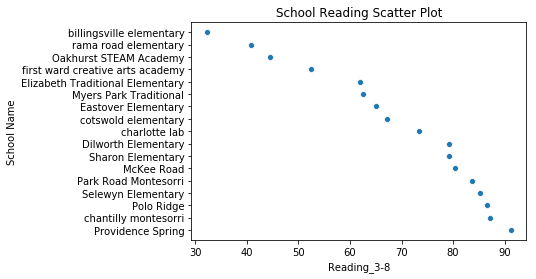

In [26]:
#Scatter plot of Reading Score by School
scatterplot = sns.scatterplot(x="Reading_3-8", y="School Name", data=datdf)
ax = plt.gca()
ax.set_title("School Reading Scatter Plot")

In [27]:
#Sorting based on science scores
datdf.sort_values('Science_5&8', ascending = False, inplace= True)
datdf

,School Name,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize,TeachRatio,White,Black,Hispanic,Asian,Mixed/other
17,Providence Spring,90.16,92.7,80.0,91.2,93.1,95.0,932.0,18.9,70.0,4.2,5.0,18.6,2.3
18,Polo Ridge,87.76,89.0,82.8,86.5,90.0,93.2,1021.0,17.8,53.5,7.1,5.3,31.1,3.1
0,chantilly montesorri,85.04,85.2,84.4,87.2,81.2,92.3,292.0,17.0,72.2,15.9,8.7,1.5,1.5
15,Dilworth Elementary,84.22,83.7,86.3,79.2,86.6,89.2,732.0,17.9,70.2,21.9,3.1,2.3,2.5
8,Selewyn Elementary,86.34,87.4,82.1,85.2,89.3,88.9,860.0,18.2,79.3,9.2,7.0,2.0,2.6
10,Park Road Montesorri,86.12,86.8,83.4,83.6,89.5,88.5,513.0,18.2,68.0,12.5,6.6,9.2,3.7
16,McKee Road,86.34,86.4,86.1,80.4,91.8,88.4,514.0,15.8,66.3,7.8,8.6,13.4,3.9
9,Sharon Elementary,78.68,80.3,72.2,79.3,79.8,84.4,830.0,17.9,69.6,13.1,5.1,9.2,2.9
13,Eastover Elementary,66.42,65.2,71.3,65.1,60.0,83.9,438.0,16.1,67.8,23.3,3.0,1.6,4.3
12,Elizabeth Traditional Elementary,69.70,69.1,72.1,61.9,72.5,79.8,536.0,17.1,18.8,63.1,12.5,2.8,2.8


Text(0.5, 1.0, 'School Science Scatter Plot')

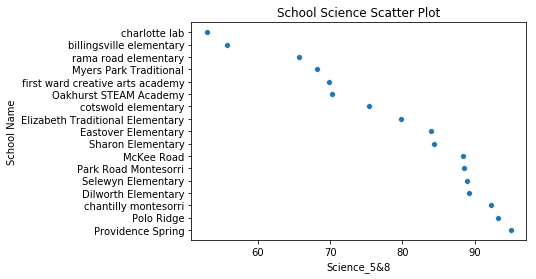

In [28]:
#Scatter plot of Science Score by School
scatterplot = sns.scatterplot(x="Science_5&8", y="School Name", data=datdf)
ax = plt.gca()
ax.set_title("School Science Scatter Plot")

<h2>Modeling the Schools based on Performance</h2>

In [29]:
#Need to import ML libraries
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report
print("libraries imported successfully!")

libraries imported successfully!


In [30]:
#Remove objects from data frame
datdf = pd.read_csv(datDir)
datdf = datdf.dropna(axis=0)
datdf = datdf.drop(['School Name'],axis=1)

In [31]:
#Scale observations
X = scale(datdf)
print(X)

[[ 9.07972242e-01  8.43331916e-01  7.59399713e-01  1.05245418e+00
   4.90463568e-01  1.05073150e+00 -1.64716674e+00  2.36175240e-01
   8.90745262e-01 -5.97361878e-01 -2.51578466e-01 -7.11882762e-01
  -8.50444321e-01]
 [-5.99285920e-01 -3.68215344e-01 -1.68700117e+00  2.54954985e-01
  -6.72487160e-01 -2.04416718e+00 -1.10278114e+00 -1.08021134e+00
   6.83206138e-01 -7.03542890e-01 -4.35396543e-01 -6.85912790e-01
   3.60934336e+00]
 [-1.22691392e+00 -9.33604065e-01 -2.32242997e+00 -9.58630743e-01
  -8.49310078e-01 -7.16659876e-01 -2.86202727e-01 -1.54094665e+00
  -1.68427721e+00  1.60270868e+00  1.40278423e+00 -8.67702594e-01
   6.19815353e-01]
 [-1.95439184e+00 -2.16534378e+00  5.68771073e-01 -2.12598463e+00
  -2.01906169e+00 -1.81637007e+00 -1.46732507e+00 -1.87004329e+00
  -1.83800989e+00  2.25253647e+00  5.47849955e-02 -5.95017888e-01
  -5.56392386e-01]
 [-2.03056119e-01 -1.99944891e-01 -9.84291670e-02 -1.09120733e-01
  -2.23628984e-01 -2.76775800e-01  8.90059029e-01 -5.53656709e-01


In [32]:
datdf.head(15)

,Performance Score,Achievement Score,Growth Score,Reading_3-8,Math_3-8,Science_5&8,SchoolSize,TeachRatio,White,Black,Hispanic,Asian,Mixed/other
0,85.04,85.2,84.4,87.2,81.2,92.3,292.0,17.0,72.2,15.9,8.7,1.5,1.5
1,66.02,67.2,61.3,73.4,64.1,52.9,404.0,15.0,66.8,13.4,7.2,1.7,10.6
4,58.10,58.8,55.3,52.4,61.5,69.8,572.0,14.3,5.2,67.7,22.2,0.3,4.5
5,48.92,40.5,82.6,32.2,44.3,55.8,329.0,13.8,1.2,83.0,11.2,2.4,2.1
6,71.02,69.7,76.3,67.1,70.7,75.4,814.0,15.8,55.9,28.5,11.3,3.1,1.2
7,58.86,50.9,90.7,40.9,54.0,65.7,603.0,15.2,19.7,45.4,28.0,4.5,2.3
8,86.34,87.4,82.1,85.2,89.3,88.9,860.0,18.2,79.3,9.2,7.0,2.0,2.6
9,78.68,80.3,72.2,79.3,79.8,84.4,830.0,17.9,69.6,13.1,5.1,9.2,2.9
10,86.12,86.8,83.4,83.6,89.5,88.5,513.0,18.2,68.0,12.5,6.6,9.2,3.7
11,57.12,55.2,64.8,44.6,57.6,70.3,631.0,15.5,15.5,44.2,31.2,6.5,2.6


In [39]:
#Create ratings based on performance score 2=Excellent, 1 = moderate, 0 = poor
ratings_list = [2, 1, 0, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2,2,2]
y = pd.DataFrame(ratings_list)
y.shape

(17, 1)

In [40]:
variable_names = ['Performance Score', 'Achievement Score','Growth Score','Reading_3-8','Math_3-8','Science_5&8','SchoolSize','TeachRatio','White','Black','Hispanic','Asian','Mixed/other']

In [41]:
#Cluster using kmeans
clustering = KMeans(n_clusters=3,random_state=5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [42]:
#Add column labels
datdf.columns=['Performance_Score', 'Achievement Score','Growth_Score','Reading_3-8','Math_3-8','Science_5&8','SchoolSize','TeachRatio','White','Black','Hispanic','Asian','Mixed/other']
y.columns=['Ratings']

Text(0.5, 1.0, 'K-Means Classification')

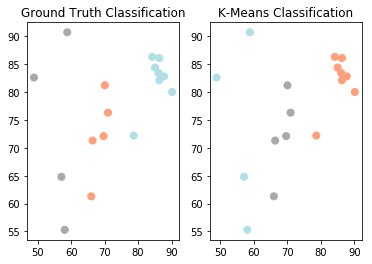

In [43]:
#Create classification scatter plot based on performance and growth score
color_theme = np.array(['darkgray','lightsalmon','powderblue'])
plt.subplot(1,2,1)
plt.scatter(x=datdf.Performance_Score,y=datdf.Growth_Score,c=color_theme[ratings_list], s=50)
plt.title('Ground Truth Classification')
plt.subplot(1,2,2)
plt.scatter(x=datdf.Performance_Score,y=datdf.Growth_Score,c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')


Text(0.5, 1.0, 'K-Means Classification')

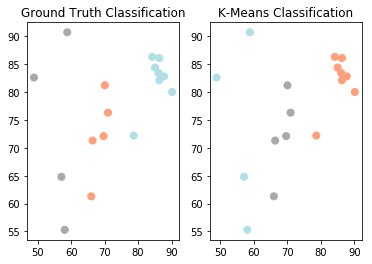

In [44]:
#Relabel the Ratings so that it matches 0,2,1
relabel = np.choose(clustering.labels_,[0,2,1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=datdf.Performance_Score,y=datdf.Growth_Score,c=color_theme[ratings_list], s=50)
plt.title('Ground Truth Classification')
plt.subplot(1,2,2)
plt.scatter(x=datdf.Performance_Score,y=datdf.Growth_Score,c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

In [45]:
#Very small data set so everything is perfectly fit. Can try with more data in the future
print(classification_report(y,relabel))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         5
           2       1.00      1.00      1.00         8

   micro avg       0.47      0.47      0.47        17
   macro avg       0.33      0.33      0.33        17
weighted avg       0.47      0.47      0.47        17

